In [1]:
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

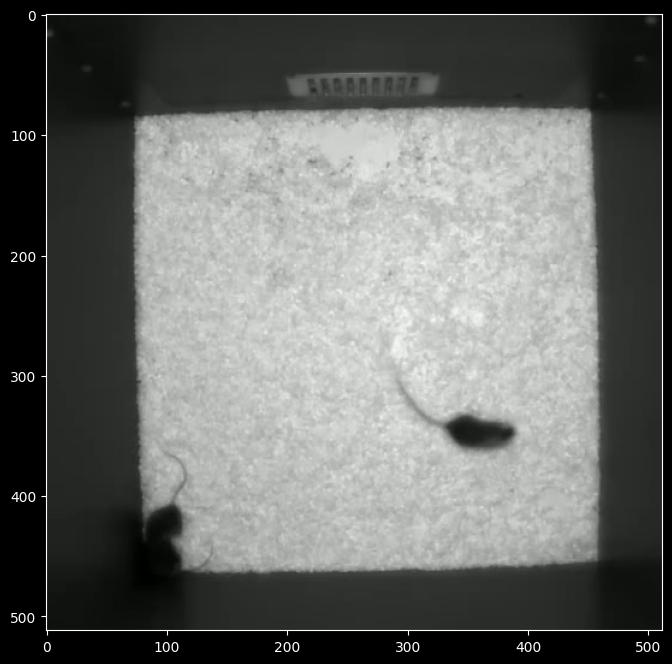

In [2]:
scene_frame_number = 100
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/MABe_template.yaml")

config['video_info']['scene_frame_number'] = scene_frame_number
config['keypoint_info']['keypoint_file_path'] = str(amadeus_root / config['keypoint_info']['keypoint_file_path'])
config['video_info']['video_file_path'] = str(amadeus_root / config['video_info']['video_file_path'])

video_path = config['video_info']['video_file_path'] 


cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_frame_number)
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
    

In [3]:
amadeus = AMADEUS(config)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0 $
current total tokens 546
The image shows a top-down view of a square enclosure with two small animals inside. The animals appear to be mice, as indicated by their size and shape. The background is a textured surface, and there is a vent or grate visible at the top of the enclosure.

```json
{
    "description": "Top-down view of a square enclosure with two mice inside. The background is a textured surface, and there is a vent or grate at the top of the enclosure.",
    "individuals": 2,
    "species": "topview_mouse",
    "background_objects": ["vent", "textured surface"]
}
```


In [4]:
from IPython.display import Markdown, display
from IPython.display import Video
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    print ('out videos', qa_message['out_videos'])
    if qa_message['out_videos'] is not None:
        for video_path in qa_message['out_videos']:
            print (video_path)
            Video(video_path, embed=True)

    display(Markdown(str(qa_message['function_rets'])))

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.02 $
current total tokens 3395


To address the query, we need to define the "watching" behavior based on the given criteria: the distance between animals should be less than 260 and larger than 50, and the head angle between animals should be less than 15 degrees. Additionally, the smooth_window_size is specified as 15.

We can achieve this by using the `get_animals_animals_events` function from the `AnimalBehaviorAnalysis` class. This function allows us to capture events involving multiple animals based on specified conditions.

Here's the plan:
1. Use `get_animals_animals_events` to capture events where the distance between animals is between 50 and 260.
2. Use `get_animals_animals_events` again to capture events where the head angle between animals is less than 15 degrees.
3. Combine these events using `get_composite_events` with the `logical_and` composition type to ensure both conditions are met simultaneously.

Now, let's write the code:

```python
def get_watching_events(config: Config):
    """
    Get events where animals are watching each other based on the defined criteria:
    - Distance between animals is less than 260 and larger than 50.
    - Head angle between animals is less than 15 degrees.
    - Smooth window size is 15.

    Parameters:
    ----------
    config: Config
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Get events where the distance between animals is between 50 and 260
    distance_events = analysis.get_animals_animals_events(
        cross_animal_query_list=['distance>50', 'distance<260'],
        bodypart_names=None,
        otheranimal_bodypart_names=None,
        min_window=1,
        max_window=100000,
        smooth_window_size=15
    )
    
    # Get events where the head angle between animals is less than 15 degrees
    head_angle_events = analysis.get_animals_animals_events(
        cross_animal_query_list=['relative_head_angle<15'],
        bodypart_names=None,
        otheranimal_bodypart_names=None,
        min_window=1,
        max_window=100000,
        smooth_window_size=15
    )
    
    # Combine the distance and head angle events using logical_and
    watching_events = analysis.get_composite_events(
        events_A=distance_events,
        events_B=head_angle_events,
        composition_type='logical_and',
        max_interval_between_sequential_events=0,
        min_window=1,
        max_window=100000
    )
    
    return watching_events
```

This function will return the events where animals are watching each other based on the specified criteria.

after executing the function


{'description': 'Top-down view of a square enclosure with two mice inside. The background is a textured surface, and there is a vent or grate at the top of the enclosure.',
 'individuals': 2,
 'species': 'topview_mouse',
 'background_objects': ['vent', 'textured surface']}

out videos ['event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_0', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_1', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_2', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_3', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_4', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_5', 'event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_6']
event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_0
event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_1
event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_2
event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_3
event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_4
event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_5
event_clips/EGS8X2MN4SSUGFWAV976_get_watching_events_video.mp4_6


[<amadeusgpt.analysis_objects.event.Event object at 0x7fa1633be5c0>, <amadeusgpt.analysis_objects.event.Event object at 0x7fa16fd33a60>, <amadeusgpt.analysis_objects.event.Event object at 0x7fa1701c8070>, <amadeusgpt.analysis_objects.event.Event object at 0x7fa16fd33a90>, <amadeusgpt.analysis_objects.event.Event object at 0x7fa1701c8250>, <amadeusgpt.analysis_objects.event.Event object at 0x7fa1701c8310>, <amadeusgpt.analysis_objects.event.Event object at 0x7fa1701c8b50>]

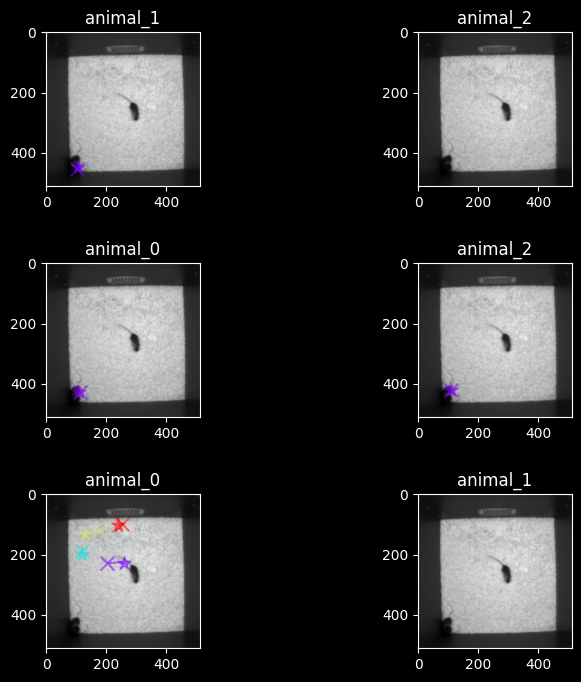

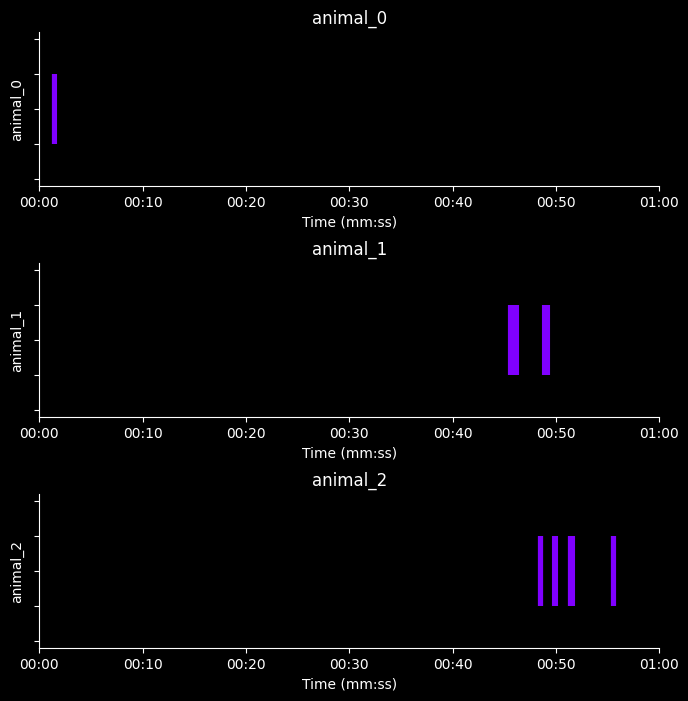

In [5]:
query = "Define watch as a social behavior where distance between animals is less than 260  \
and larger than 50 and head angle between animals is less than 15. The smooth_window_size is 15. Get watching"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)